In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5EncoderModel
from torch import nn
import torch
from torch.nn import functional as F
from torch import optim
from torch.utils.data import DataLoader
from Datasets import Modes, WikiTable, SquadDataset
from PIL import Image

In [2]:
# tokenizer = T5Tokenizer.from_pretrained('t5-base')

In [3]:
# pergunta = "what was the last year where this team was a part of the usl a-league?"
# tokenizer = T5Tokenizer.from_pretrained('t5-base')
# target = tokenizer.encode_plus(pergunta,
#                                        padding='max_length',
#                                        truncation=True,
#                                        max_length=128,
#                                        return_tensors='pt')

In [4]:
# encoder = T5EncoderModel.from_pretrained('t5-base')
# decoder = decoder = T5ForConditionalGeneration.from_pretrained('t5-base')

In [5]:
# decoder.config.d_ff

In [6]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.block = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                                   nn.BatchNorm2d(out_channels),
                                   nn.LeakyReLU(),
                                   nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=2, padding=1),
                                   nn.BatchNorm2d(out_channels),
                                   nn.LeakyReLU())

    def forward(self, x):
        return self.block(x)

embedding_extractor = nn.Sequential(ConvBlock(3, 16),
                                     ConvBlock(16, 64),
                                     ConvBlock(64, 256),
                                     ConvBlock(256, 768))

In [7]:
tokenizer = T5Tokenizer.from_pretrained('t5-base')
ds = SquadDataset(Modes.TRAIN, tokenizer=tokenizer, max_len=128)
sample = ds[5]

Reusing dataset squad_v2 (/root/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/0e44b51f4035c15e218d53dc9eea5fe7123341982e524818b8500e4094fffb7b)


In [8]:
sample

{'table_img': tensor([[[0.7882, 0.9137, 0.9529,  ..., 1.0000, 1.0000, 1.0000],
          [0.9765, 1.0000, 0.9608,  ..., 1.0000, 1.0000, 0.7804],
          [0.9608, 1.0000, 0.9843,  ..., 1.0000, 0.8196, 1.0000],
          ...,
          [1.0000, 0.8431, 0.8039,  ..., 1.0000, 0.9529, 0.7882],
          [0.7804, 0.9059, 1.0000,  ..., 1.0000, 0.9451, 1.0000],
          [0.8667, 0.8902, 1.0000,  ..., 0.9765, 0.8353, 1.0000]],
 
         [[1.0000, 1.0000, 0.8902,  ..., 0.8039, 1.0000, 1.0000],
          [1.0000, 0.9608, 1.0000,  ..., 1.0000, 1.0000, 0.9843],
          [0.9686, 0.8353, 0.7804,  ..., 1.0000, 0.8196, 0.9686],
          ...,
          [1.0000, 0.9922, 0.8353,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 0.7882, 0.9373,  ..., 0.8510, 0.8667, 1.0000],
          [1.0000, 1.0000, 0.9843,  ..., 0.8980, 1.0000, 1.0000]],
 
         [[1.0000, 0.8980, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 0.9137,  ..., 0.8745, 0.9451, 1.0000],
          [0.9059, 1.0000, 

Some weights of the model checkpoint at t5-base were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


prof.shape torch.Size([6, 768, 128])
Vai pfv loss: 5.92031192779541
0 - Decoded: ['a a a solitary a solitary', '', '', 'a a a b a c a', '', '']
0 Real: ['They champion the talent of the individual', 'FD&C', 'Eastern European Time', 'N/A', '310 billion barrels', 'one man']
prof.shape torch.Size([6, 768, 128])
Vai pfv loss: 4.152350902557373
1 - Decoded: ['', '', '', '', '', '']
1 Real: ['They champion the talent of the individual', 'FD&C', 'Eastern European Time', 'N/A', '310 billion barrels', 'one man']
prof.shape torch.Size([6, 768, 128])
Vai pfv loss: 7.260491847991943
2 - Decoded: ['', '', '', '', '', '']
2 Real: ['They champion the talent of the individual', 'FD&C', 'Eastern European Time', 'N/A', '310 billion barrels', 'one man']
prof.shape torch.Size([6, 768, 128])
Vai pfv loss: 5.982831954956055
3 - Decoded: ['c', 'c', 'c', 'c', 'c', 'c']
3 Real: ['They champion the talent of the individual', 'FD&C', 'Eastern European Time', 'N/A', '310 billion barrels', 'one man']
prof.shape to

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19 - Decoded: ['They champion the talent of the individual they they champion the talent of the individual they', 'FD&C FD&C', 'Eastern European Time Eastern European Time', 'N/A N N N N N N N', '310 billion barrels310 billion barrels310 billion barrels310', 'one man one man one man one man']
19 Real: ['They champion the talent of the individual', 'FD&C', 'Eastern European Time', 'N/A', '310 billion barrels', 'one man']


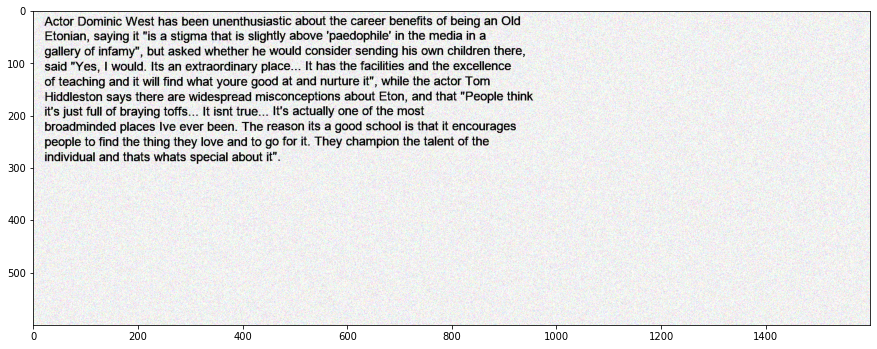

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Question: According to actor Tom Hiddleston, that is special about Eton?


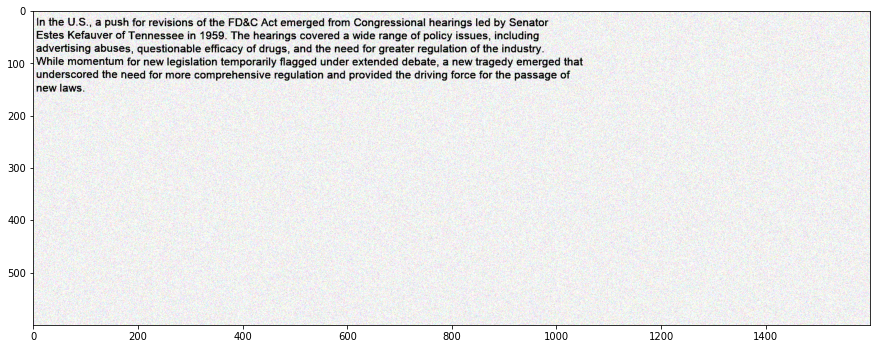

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Question: Congressional hearings emerged addressing revisions to what act?


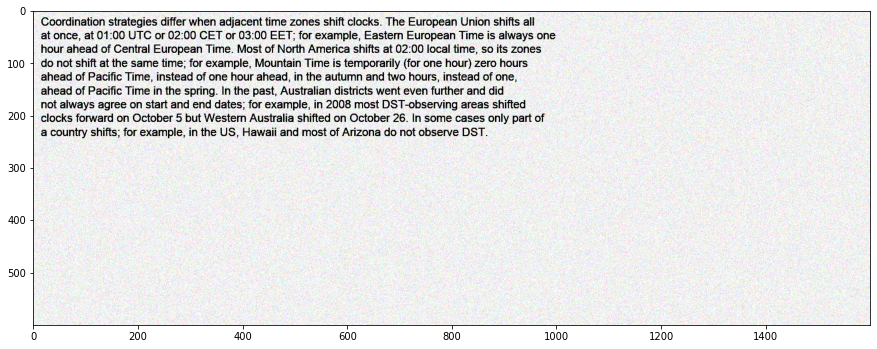

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Question: Which time zone in Europe always has a one-hour lead on Central European Time?


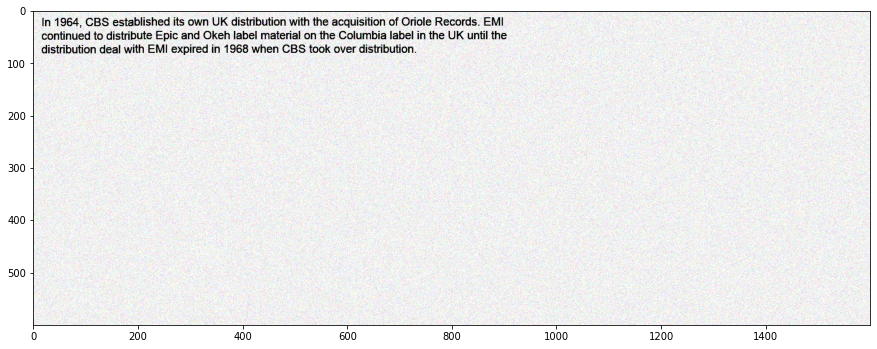

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Question: ABC established it own UK distribution in what year?


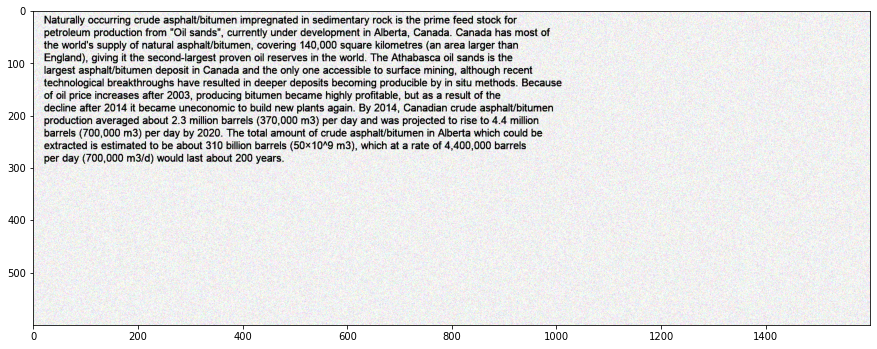

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Question: What is the amount of bitumen that can be extracted in Alberta?


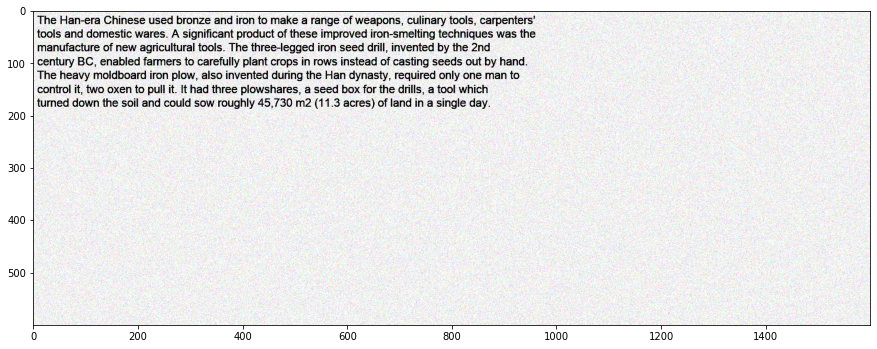

Question: How many persons were necessary to operate an iron plow?


In [17]:
import itertools
def sample():
    
    decoder = T5ForConditionalGeneration.from_pretrained('t5-base')
#     encoder = T5EncoderModel.from_pretrained('t5-base')

    encoder = decoder.get_encoder()
    
    dl = DataLoader(ds, batch_size=6, shuffle=True)
    samples = next(iter(dl))
#     sample = ds[5]
    
#     enc_out = encoder(input_ids=sample['question_ids'].unsqueeze(0),
#                      attention_mask=sample['question_attn_mask'].unsqueeze(0))
    
#     hidden = enc_out.last_hidden_state
    
#     print(f"hidden shp: {hidden.shape}")
    
#     print(sample['question_ids'].shape, sample['question_attn_mask'].shape)
    
    #torch.Size([1, 768, 32, 32])
#     features = embedding_extractor(ds[0]['table_img'].unsqueeze(0))
    
    #torch.Size([1, 32, 32, 768]) -> torch.Size([1, 32*32, 768])
#     features = features.permute(0, 2, 3, 1).view(1, -1, decoder.config.d_model)
    
#     torch.Size([1, 1152, 768])
#     features = torch.cat([features, hidden], dim =1)
    
#     print(f"feat shape: {features.shape}")
    
    #torch.Size([1, 768, 1152])
#     features = features.permute(0, 2, 1)
    
#     linear = nn.Linear(1088, ds.max_len, bias=False)
    linear = nn.Linear(3928, ds.max_len)
    #torch.Size([1, 768, 128])
#     proj = linear(features)
    
    #hidden state
    #torch.Size([1, 128, 728])
#     proj = proj.permute(0, 2, 1)
    
    #batch size x seqlen x self.d_model
#     print(f"proj shape: {proj.shape}")
    
    opt = optim.Adam(itertools.chain(encoder.parameters(), decoder.parameters(),
                                    linear.parameters(), embedding_extractor.parameters()), lr=5e-4)
    
    for epo in range(20):
        opt.zero_grad()
        
        encoder.train()
        decoder.train()
        
        
        enc_out = encoder(input_ids=samples['question_ids'],
                          attention_mask=samples['question_attn_mask'],
                          output_attentions=True)
        
        hidden = enc_out.last_hidden_state
#         print(f"hiddn.shape: {hidden.shape}")
        proj = None
        
        B = hidden.size(0)
        features = embedding_extractor(samples['table_img'])
        features = features.permute(0, 2, 3, 1).view(B, -1, decoder.config.d_model)
        features = torch.cat([features, hidden], dim =1)
        features = features.permute(0, 2, 1)
#         print(f"prof.shape {proj.shape}")
        proj = linear(features)
        print(f"prof.shape {proj.shape}")
#         proj = F.relu(proj)
        proj = proj.permute(0, 2, 1)
        
        if proj is None:
            proj = features
        loss = decoder(encoder_outputs=(proj, ), 
                       labels=samples['target_ids']).loss

#         loss = decoder(inputs_embeds=proj, 
#                        labels=sample['target_ids'].unsqueeze(0)).loss
        
        print(f"Vai pfv loss: {loss}")
        loss.backward()
        opt.step()
        
        with torch.no_grad():
            encoder.eval()
            decoder.eval()
            embedding_extractor.eval()
        
            
            enc_out = encoder(input_ids=samples['question_ids'],
                     attention_mask=samples['question_attn_mask'],
                             output_attentions=True)
        
            encoder_hidden_states = enc_out.last_hidden_state
            features = embedding_extractor(samples['table_img'])
            features = features.permute(0, 2, 3, 1).view(B, -1, decoder.config.d_model)
            features = torch.cat([features, encoder_hidden_states], dim =1)
            features = features.permute(0, 2, 1)

            proj = linear(features)
#             proj = F.relu(proj)
#             print(f"proj.shape: {proj.shape}")
#             #-------------------------------------------------
            encoder_hidden_states = proj.permute(0, 2, 1)
# #             print(f"Hidden shp: {encoder_hidden_states.shape}")
            B = encoder_hidden_states.size(0)
    
            decoded_ids = torch.full((B, 1),
                                 decoder.config.decoder_start_token_id,
                                 dtype=torch.long)
            
            for step in range(20):
                outputs = decoder(decoder_input_ids=decoded_ids,
                                  encoder_outputs=(encoder_hidden_states,),
                                  return_dict=True)
#                 outputs = decoder(decover_input_embeds)
                logits = outputs["logits"]

                next_token_logits = logits[:, -1, :]

                # Greedy decoding
                next_token_id = next_token_logits.argmax(1).unsqueeze(-1)

                # Check if output is end of senquence for all batches
                if torch.eq(next_token_id[:, -1], tokenizer.eos_token_id).all():
                    break

                # Concatenate past ids with new id, keeping batch dimension
                decoded_ids = torch.cat([decoded_ids, next_token_id], dim=-1)
            
            print(f"{epo} - Decoded: {tokenizer.batch_decode(decoded_ids, skip_special_tokens=True)}")
            print(f"{epo} - Real: {samples['answer']}")
    
    for idx, elem in enumerate(samples['table_img']):
        img = np.transpose(elem.cpu().numpy(), (1, 2, 0))
        plt.figure(figsize=(15, 15))
        plt.imshow(img)
        plt.show()
        print(f"Question: {samples['question'][idx]}")
#     print(f"Questions: {samples['question']}")
    del encoder, decoder, hidden, enc_out, features, linear, proj, opt

sample()

In [120]:
target.input_ids.shape, target.attention_mask.shape

(torch.Size([1, 128]), torch.Size([1, 128]))

In [ ]:
decoder.get_encoder()

In [121]:
a = encoder(input_ids=target.input_ids, attention_mask=target.attention_mask, output_attentions=True)

In [122]:
a.last_hidden_state

tensor([[[-0.2139,  0.1358,  0.2902,  ..., -0.5094, -0.5432, -0.0968],
         [-0.2147, -0.0238, -0.1447,  ..., -0.2354, -0.1443, -0.3103],
         [-0.0410,  0.0897, -0.3892,  ..., -0.2407, -0.1751, -0.6424],
         ...,
         [-0.4393,  0.1653, -0.1272,  ...,  0.0248,  0.2123,  0.0096],
         [-0.4393,  0.1653, -0.1272,  ...,  0.0248,  0.2123,  0.0096],
         [-0.4393,  0.1653, -0.1272,  ...,  0.0248,  0.2123,  0.0096]]],
       grad_fn=<MulBackward0>)

In [ ]:
a

In [124]:
v.shape, a.last_hidden_state.shape

(torch.Size([1, 1536, 16, 40]), torch.Size([1, 128, 768]))

In [125]:
test = torch.cat([v.view(1, -1),a.last_hidden_state.view(1, -1)], dim=1)

In [126]:
test.shape

torch.Size([1, 1081344])

In [64]:
labels = tokenizer.encode_plus("204",
                                       padding='max_length',
                                       truncation=True,
                                       max_length=128,
                                       return_tensors='pt').input_ids

In [132]:
labels.shape

torch.Size([1, 128])

In [20]:
decoder = T5ForConditionalGeneration.from_pretrained('t5-base')

Some weights of the model checkpoint at t5-base were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [168]:
decoder(encoder_outputs=(t.permute(0, 2, 1), ), labels=labels).loss

tensor(9.3917, grad_fn=<NllLossBackward>)

In [67]:
decoder.config.d_model

768

In [148]:
ajustado = embedding_extractor(img_tensor.unsqueeze(0)).permute(0, 2, 3, 1)

In [149]:
ajustado = ajustado.view(1, -1, 768)

torch.Size([1, 25, 63, 768])

In [150]:
ajustado = ajustado.view(1, -1, 768)

In [151]:
ajustado.shape

torch.Size([1, 1575, 768])

In [159]:
ajustado.permute(0, 2, 1).shape

torch.Size([1, 768, 1575])

In [162]:
l = nn.Linear(1575, 128)

In [163]:
t = l(ajustado.permute(0, 2, 1))

In [166]:
t.permute(0, 2, 1).shape

torch.Size([1, 128, 768])